In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
file1 = open("data\hi\hi.txt","r", encoding = "UTF-8", errors = 'ignore')

In [2]:
uni_syll = {}
bi_syll = {}
tri_syll = {}
f = 0

In [3]:
dep_vowels = ["ा", "ि", "ी", "ु", "ू", "े", "ो", "ै", "ौ", "ृ", "ॄ", "ॉ", "ं", "ं", "़", "ॅ"]
vowels = ["अ", "आ", "इ", "ई", "उ", "ऊ", "ऋ", "ॠ", "ए", "ऐ", "ओ", "औ", "अं", "अः"]
punctuations=["।",";",",",":","!",'"',"?",":-","-","{","(","}",")","_","०","S","―","=","[","]","......",":-",".","॥",'”',"|","�","\xa0"]

In [4]:
def cal_freq_s(word):
    flag = False
    sylls = []
    syl = ""
    for w in word:
        if ord(w) not in range(0x0900, 0x097F):
            continue
        if w in punctuations:
            continue
        if w == "्":
            syl += w
            flag = False
        elif w in dep_vowels:
            syl += w
        else:
            if flag:
                sylls.append(syl)
                syl = w
            else:
                syl += w
                flag = True
    if flag:
        sylls.append(syl)

    c = 0
    bi_win = sylls[:1]
    tri_win = sylls[:2]
    
    for syl in sylls:
        if syl not in uni_syll.keys():
            uni_syll[syl] = 1
        else:
            uni_syll[syl] += 1

        if c >= 1:
            s = bi_win[0] + syl
            if s not in bi_syll.keys():
                bi_syll[s] = 1
            else:
                bi_syll[s] += 1
            bi_win[0] = syl

        if c >= 2:
            s = tri_win[0] + tri_win[1] + syl
            if s not in tri_syll.keys():
                tri_syll[s] = 1
            else:
                tri_syll[s] += 1
            tri_win[0] = tri_win[1]
            tri_win[1] = syl
            
        c+=1

In [30]:
while True and f <= 20000000:
    line = file1.readline()
    if not line:
        break
    f += 1
#     print(line)
    words = line.split()
    for word in words:
        cal_freq_s(word)

In [32]:
output = {}
uni_sylls = sorted(uni_syll.items(), key = lambda x: x[1], reverse=True)[:100]
bi_sylls = sorted(bi_syll.items(), key = lambda x: x[1], reverse=True)[:100]
tri_sylls = sorted(tri_syll.items(), key = lambda x: x[1], reverse=True)[:100]
output["uni_sylls"] = [i[0] for i in uni_sylls]
uni_count = [i[1] for i in uni_sylls]
output["bi_sylls"] = [i[0] for i in bi_sylls]
bi_count = [i[1] for i in bi_sylls]
output["tri_sylls"] = [i[0] for i in tri_sylls]
tri_count = [i[1] for i in tri_sylls]

In [33]:
data = pd.DataFrame(output)

In [34]:
data.to_csv('Top_Syllable.txt', index = False)

Text(0, 0.5, 'Frequency')

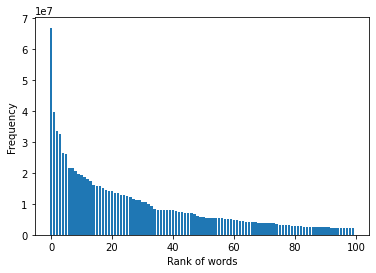

In [35]:
plt.bar([i for i in range(100)], uni_count)
plt.xlabel("Rank of words")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

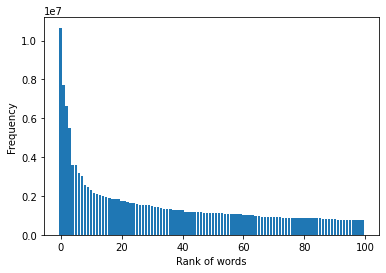

In [36]:
plt.bar([i for i in range(100)], bi_count)
plt.xlabel("Rank of words")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

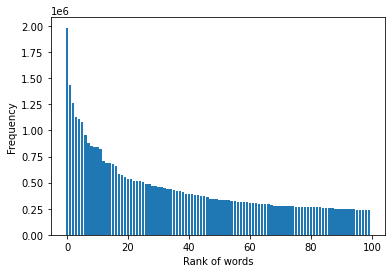

In [37]:
plt.bar([i for i in range(100)], tri_count)
plt.xlabel("Rank of words")
plt.ylabel("Frequency")